In [39]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk("C:/Users/hp/Desktop/Fresh Water Fish Dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus - Copy (2).jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus - Copy (3).jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus - Copy (4) - Copy.jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus - Copy (4).jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus - Copy.jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus 1 - Copy (2) - Copy.jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus 1 - Copy (2).jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus 1 - Copy (3).jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus 1 - Copy (4).jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus 1 - Copy.jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus 1.jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus.14 - Copy (2) - Copy.jpg
C:/Users/hp/Desktop/Fresh Water Fish Dataset\Argulus\argulus.14 - Copy 

In [40]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [41]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [42]:

dataset=tf.keras.preprocessing.image_dataset_from_directory("C:/Users/hp/Desktop/Fresh Water Fish Dataset",seed=200,shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)
      


Found 324 files belonging to 7 classes.


In [43]:
class_names = dataset.class_names
class_names

['Argulus',
 'Broken antennae and rostrum',
 'EUS',
 'Healthy Fish',
 'Redspot',
 'THE BACTERIAL GILL ROT',
 'Tail And Fin Rot']

In [44]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[6 4 5 6 5 6 4 3 3 4 5 6 4 0 5 1 6 5 1 2 2 5 0 5 5 5 2 3 4 2 4 2]


In [46]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [47]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [48]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [49]:
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./256),
  
])

In [51]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [52]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=7
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='ReLU',input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [54]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=70,
)

Epoch 1/70


8/8 [==============================] - 10s 911ms/step - loss: 1.9406 - accuracy: 0.1328 - val_loss: 1.9011 - val_accuracy: 0.1562
Epoch 2/70
8/8 [==============================] - 7s 839ms/step - loss: 1.8837 - accuracy: 0.2070 - val_loss: 1.9410 - val_accuracy: 0.2188
Epoch 3/70
8/8 [==============================] - 7s 909ms/step - loss: 1.7785 - accuracy: 0.3047 - val_loss: 1.7423 - val_accuracy: 0.2812
Epoch 4/70
8/8 [==============================] - 7s 862ms/step - loss: 1.6589 - accuracy: 0.3516 - val_loss: 1.8987 - val_accuracy: 0.2188
Epoch 5/70
8/8 [==============================] - 7s 862ms/step - loss: 1.5541 - accuracy: 0.4180 - val_loss: 1.7036 - val_accuracy: 0.3750
Epoch 6/70
8/8 [==============================] - 7s 857ms/step - loss: 1.5047 - accuracy: 0.4219 - val_loss: 1.5621 - val_accuracy: 0.4062
Epoch 7/70
8/8 [==============================] - 7s 855ms/step - loss: 1.4039 - accuracy: 0.4727 - val_loss: 1.3860 - val_accuracy: 0.5625
Epoch 8/70
8/8 [==============

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                 

In [56]:
score=model.evaluate(test_ds)

2/2 [==============================] - 1s 178ms/step - loss: 0.0818 - accuracy: 0.9844


In [57]:
score

[0.08180361986160278, 0.984375]

In [58]:
history
history.params

{'verbose': 1, 'epochs': 70, 'steps': 8}

In [59]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

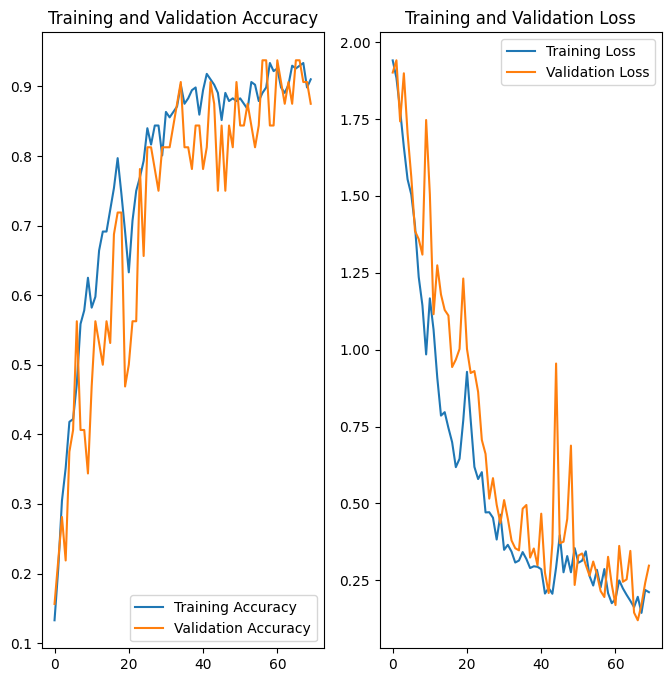

In [61]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(70), acc, label='Training Accuracy')
plt.plot(range(70), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(70), loss, label='Training Loss')
plt.plot(range(70), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tail And Fin Rot
1/1 [==============================] - 0s 292ms/step
predicted label: Tail And Fin Rot
first image to predict
actual label: Argulus
1/1 [==============================] - 0s 196ms/step
predicted label: Argulus


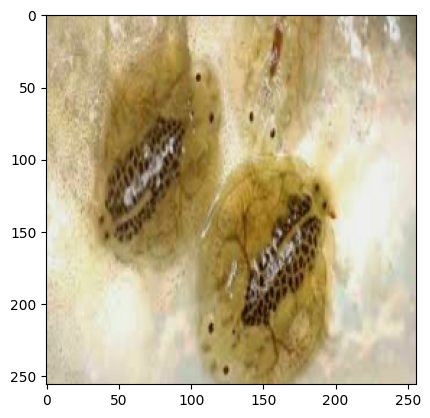

In [62]:
import numpy as np
for images_batch, labels_batch in test_ds.take(2):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 3)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


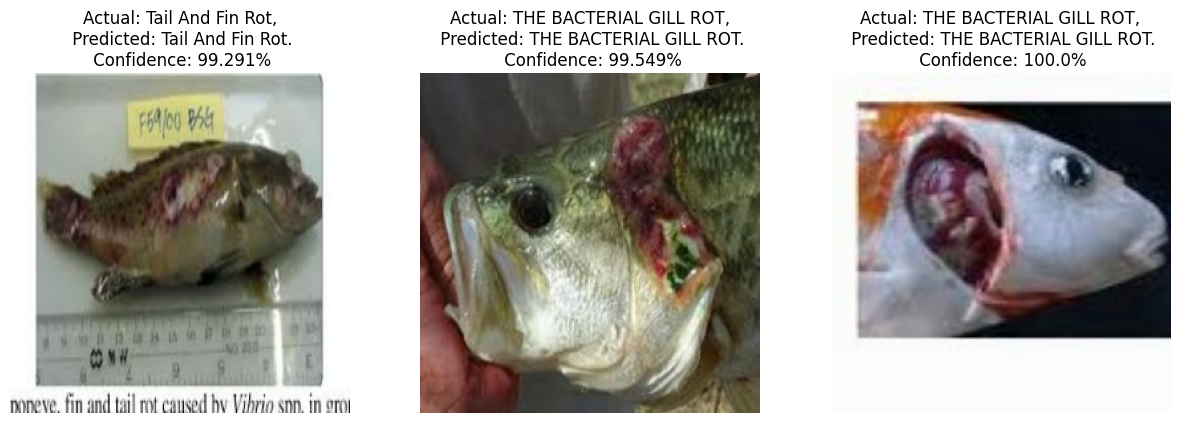

In [64]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(2):
    for i in range(3):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

1/1 [==============================] - 0s 39ms/step


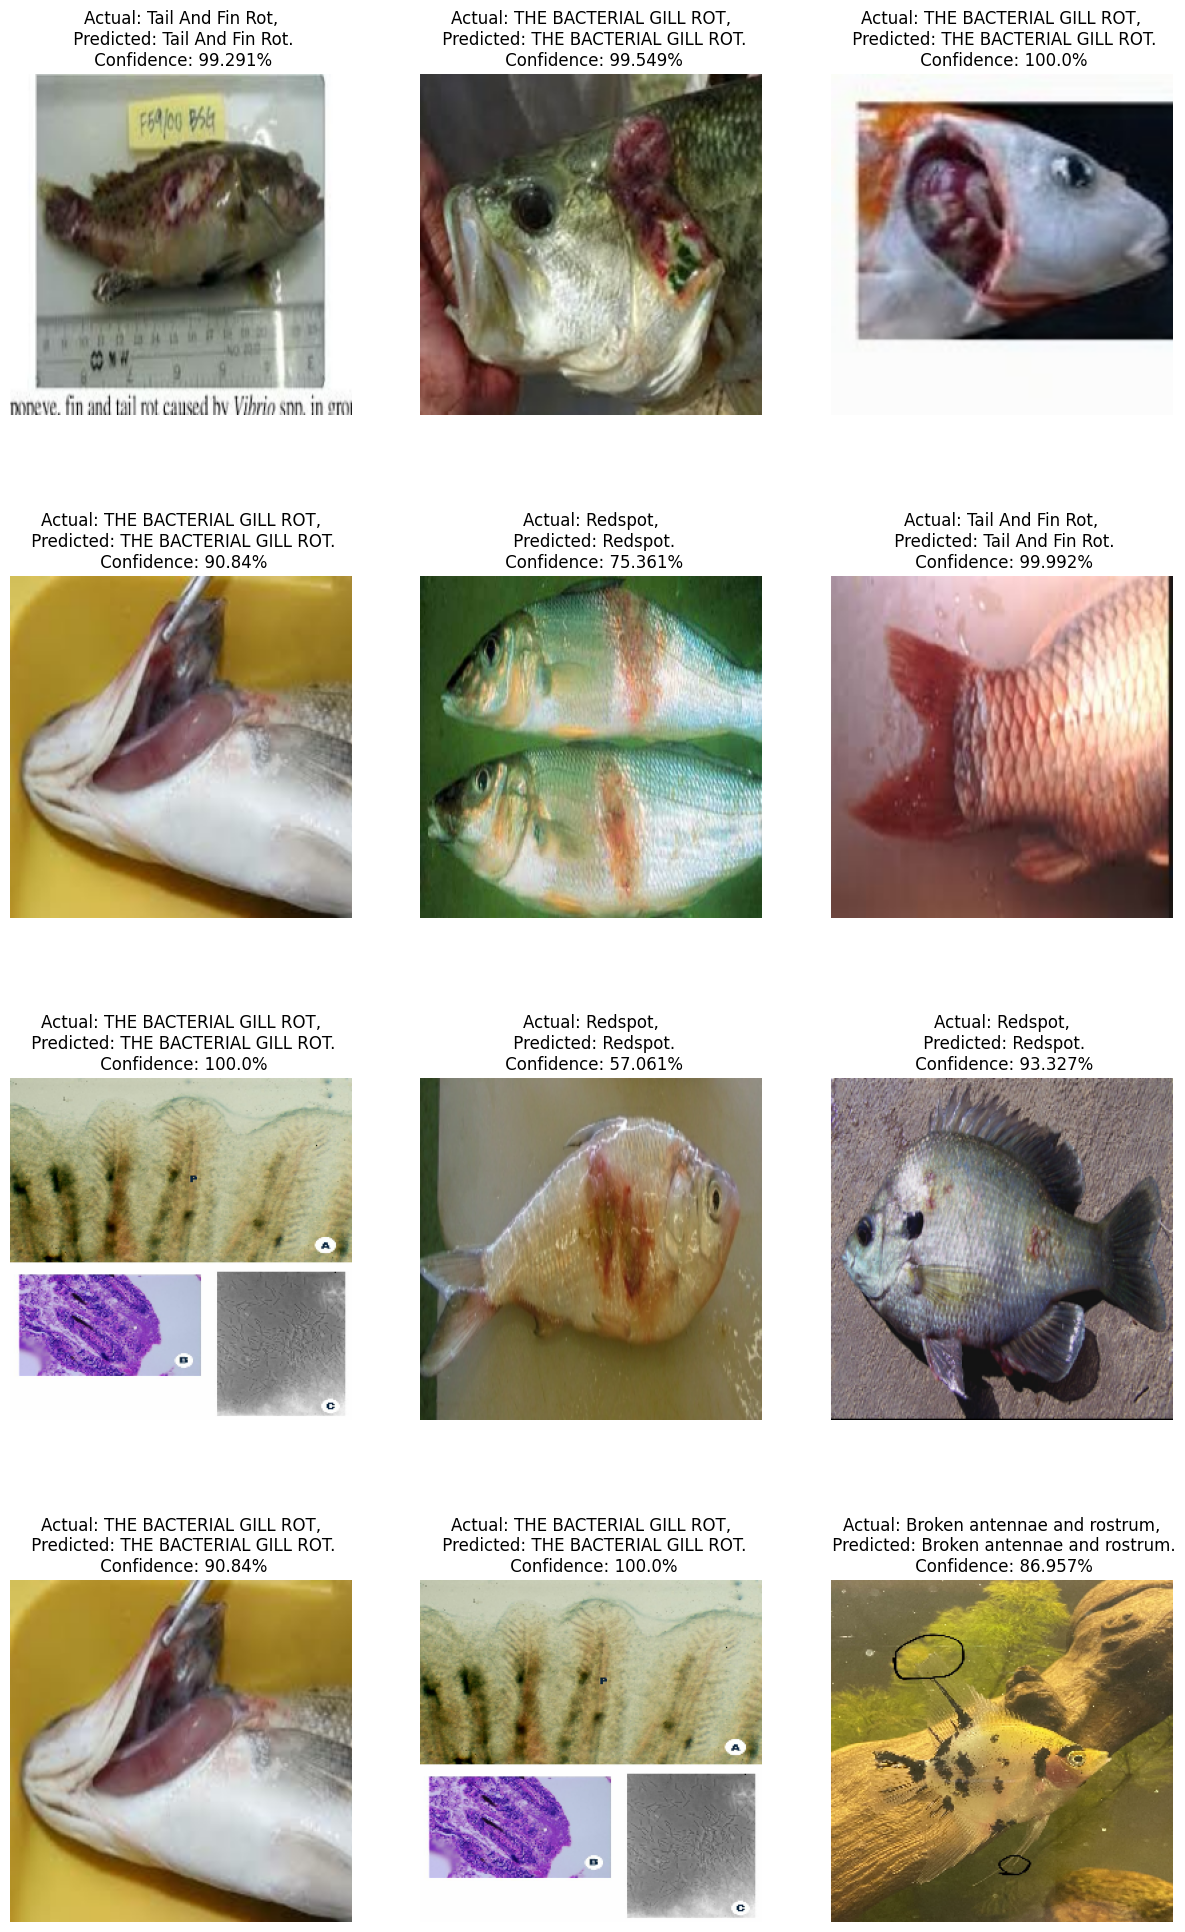

In [73]:
plt.figure(figsize=(15,25))
for images, labels in test_ds.take(2):
    for i in range(12):
        ax = plt.subplot(4, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test dataset to obtain true and predicted labels
for images, labels in test_ds:
    for i in range(len(labels)):
        true_labels.append(labels[i].numpy())
        predicted_class_index, _ = predict(model, images[i].numpy())  # Assuming predict() returns the class index
        predicted_labels.append(predicted_class_index)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')  # Calculate macro-average precision
recall = recall_score(true_labels, predicted_labels, average='macro')  # Calculate macro-average recall
f1 = f1_score(true_labels, predicted_labels, average='macro')  # Calculate macro-average F1-score
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)



1/1 [==============================] - 0s 35ms/step
Accuracy: 0.984375
Precision: 0.9714285714285714
Recall: 0.9857142857142858
F1-score: 0.9766081871345029
Confusion Matrix:
 [[10  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0 10  0  0  0]
 [ 0  0  1  0  9  0  0]
 [ 0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0 12]]


In [ ]:
# Initialize lists to store true labels and predicted scores
true_labels = []
predicted_scores = []

# Iterate over the dataset to predict labels for each image batch
for image_batch, labels_batch in dataset.take(1):
    # Predict labels for the entire batch of images
    predicted_probs = model.predict(image_batch)
    
    # Convert true labels batch to numpy array
    true_labels_batch = labels_batch.numpy()
    
    # Append true labels and predicted scores for each image in the batch
    for true_label, predicted_prob in zip(true_labels_batch, predicted_probs):
        true_labels.append(true_label)
        # Assuming binary classification and taking the probability of the positive class
        predicted_scores.append(predicted_prob[1])  

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_scores = np.array(predicted_scores)

# Print the true labels and predicted scores
print("True Labels:", true_labels)
print("Predicted Scores:", predicted_scores)


1/1 [==============================] - 0s 193ms/step
True Labels: [5 0 2 4 3 0 6 3 3 5 1 4 1 0 3 0 4 3 3 6 3 0 1 3 6 2 2 4 5 2 3 5]
Predicted Scores: [1.08905737e-14 2.65867682e-04 5.13255550e-03 1.45841651e-02
 1.48114738e-08 2.65867682e-04 9.98968797e-10 1.00333426e-04
 9.33966415e-09 2.40818001e-02 9.61186826e-01 1.82739277e-05
 9.61186826e-01 6.78293640e-04 2.89057054e-13 5.00429431e-09
 3.70450347e-04 1.38566689e-13 2.46706440e-11 2.52159516e-05
 1.44940032e-10 2.65867682e-04 1.00000000e+00 1.36931703e-07
 2.52159516e-05 3.95903015e-04 9.73011911e-01 4.54933457e-02
 2.40818001e-02 7.67803249e-06 0.00000000e+00 1.06969271e-15]
